In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

y = Xw + b + e

In [2]:
num_inputs = 2
num_examples = 11
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
labels[:]


[ 5.9830885   2.2537768  12.173661    2.2000666  11.654712    0.9427751
  4.804765    3.2881198   0.34964907  4.3604717   5.9504075 ]
<NDArray 11 @cpu(0)>

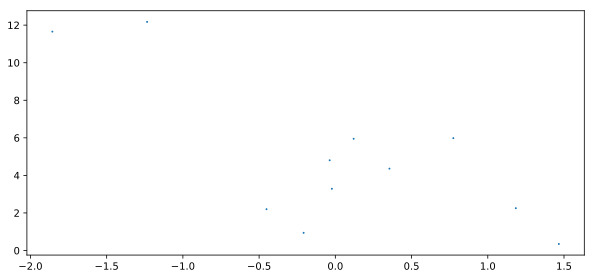

In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(10.0, 4.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']= figsize
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1)

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [6]:
batch_size = 1
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.57938355 -1.856082  ]]
<NDArray 1x2 @cpu(0)> 
[11.654712]
<NDArray 1 @cpu(0)>


In [7]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [8]:
w.attach_grad()
b.attach_grad()

In [9]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [10]:
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [12]:
lr = 0.03
num_epochs = 10
net = linreg
loss = square_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 7.941607
epoch 2, loss 3.598741
epoch 3, loss 1.794130
epoch 4, loss 0.914345
epoch 5, loss 0.478264
epoch 6, loss 0.250551
epoch 7, loss 0.132130
epoch 8, loss 0.070213
epoch 9, loss 0.037039
epoch 10, loss 0.019658


In [13]:
true_w, w

([2, -3.4], 
 [[ 2.0132854]
  [-3.2343209]]
 <NDArray 2x1 @cpu(0)>)

In [14]:
true_b, b

(4.2, 
 [4.067023]
 <NDArray 1 @cpu(0)>)